In [1]:
from keras.models import load_model
model=load_model('cats_and_dogs_small_2.h5')
model.summary()

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 34, 34, 128)       73856     
_______________________________________

In [11]:
img_path='/media/bagrat/Новый том/Загрузки/kaggle/dogs-vs-cats/dogs_vs_cats_small/test/cats/cat.1700.jpg'
from keras.preprocessing import image
import numpy as np

img=image.load_img(img_path,target_size=(150,150))
img_tensor=image.img_to_array(img)
print(img_tensor.shape)
img_tensor=np.expand_dims(img_tensor,axis=0)
img_tensor= img_tensor / 255.
img_tensor.shape

(150, 150, 3)


(1, 150, 150, 3)

In [30]:
from keras import models
layer_outputs=[layer.output for layer in model.layers[:8]]
activation_model=models.Model(inputs=model.input,outputs=layer_outputs)
activations=activation_model.predict(img_tensor)

In [31]:
len(activasions)

8

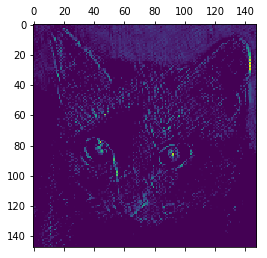

In [32]:
import matplotlib.pyplot as plt
first_layer_activation=activations[0]
plt.matshow(first_layer_activation[0,:,:,14],cmap='viridis')


/home/bagrat/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


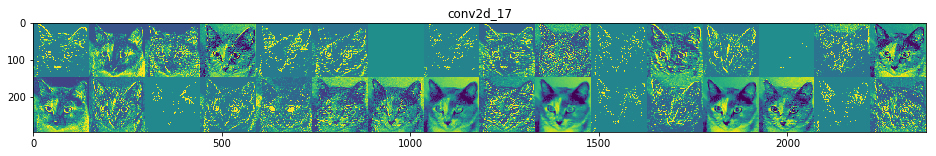

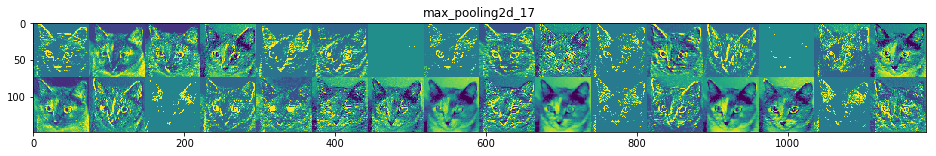

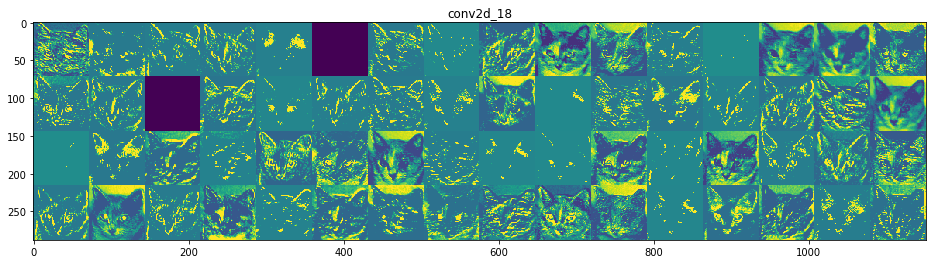

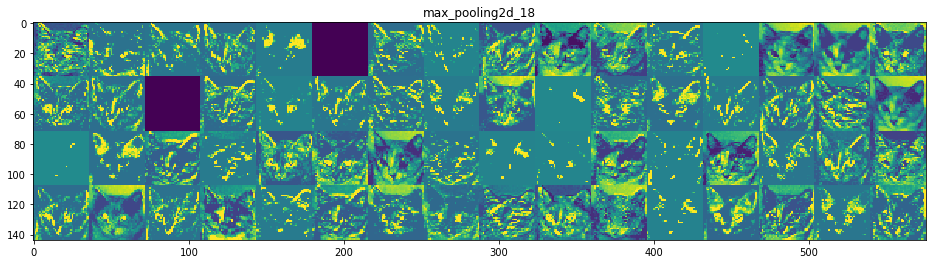

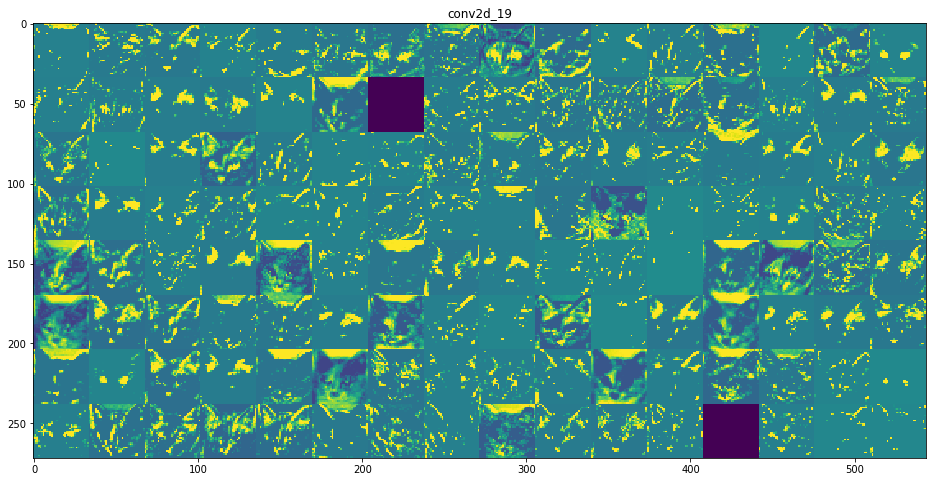

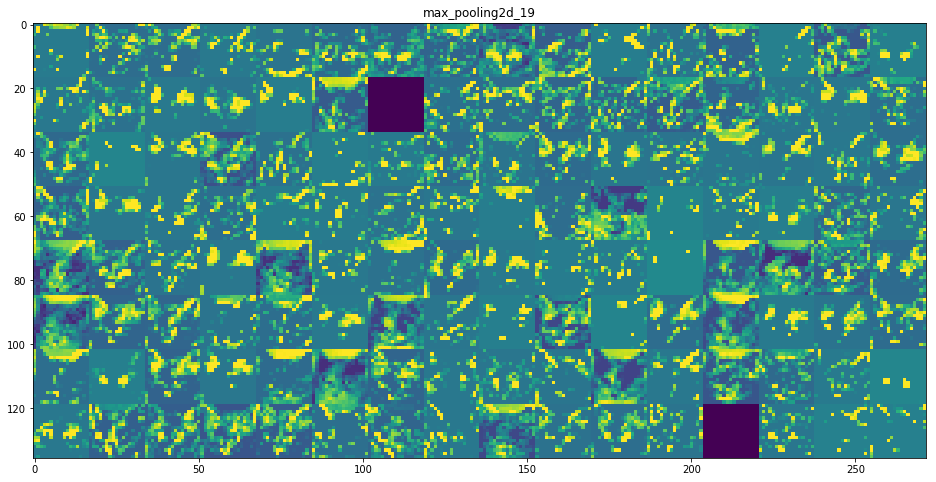

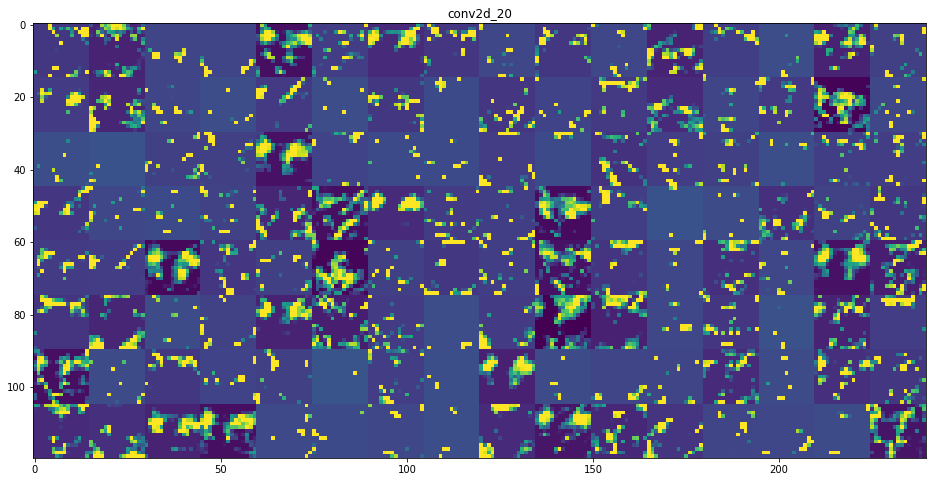

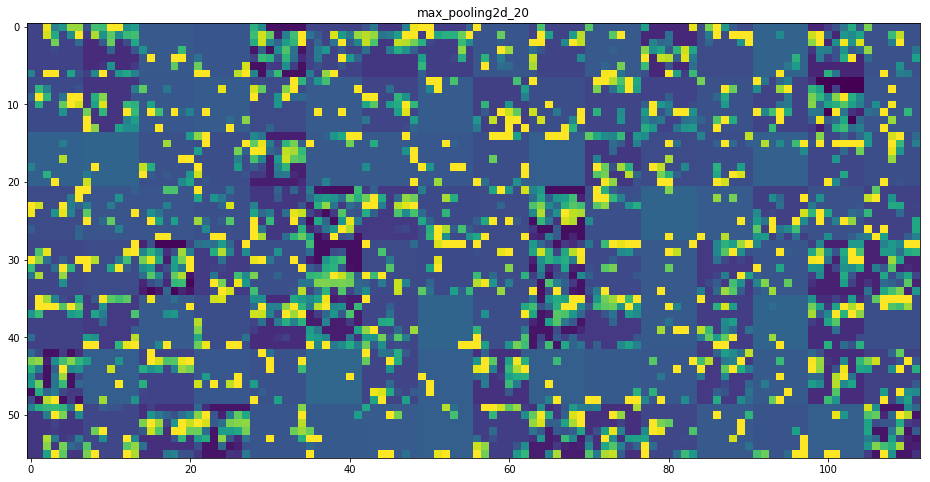

In [37]:
layer_names=[]
for layer in model.layers[:8]:
    layer_names.append(layer.name)
images_per_row=16
for layer_name,layer_activation in zip(layer_names,activations):
    n_features=layer_activation.shape[-1]
    
    size=layer_activation.shape[1]
    n_cols=n_features//images_per_row
    display_grid=np.zeros((size*n_cols,images_per_row*size))
    
    for col in range(n_cols):
        for row in range (images_per_row):
            channel_image=layer_activation[0,:,:,col*images_per_row+row]
            channel_image-=channel_image.mean()
            channel_image/=channel_image.std()
            channel_image*=64
            channel_image+=128
            channel_image=np.clip(channel_image,0,255).astype('uint8')
            display_grid[col*size:(col+1)*size,row*size:(row+1)*size]=channel_image
    scale=1/size
    plt.figure(figsize=(scale*display_grid.shape[1],scale*display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid,aspect='auto',cmap='viridis')